# Fashion MNIST Data Classification using CNN

## Step 1) Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

## Step 2) Load data

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Print the shape of data

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels = ['T-shirt/top', 'Trouser',	'Pullover',	'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Show image

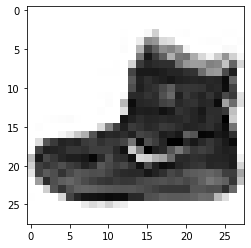

In [ ]:
plt.imshow(X_train[0], cmap='Greys')

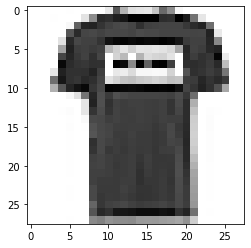

In [ ]:
plt.imshow(X_train[1], cmap='Greys')

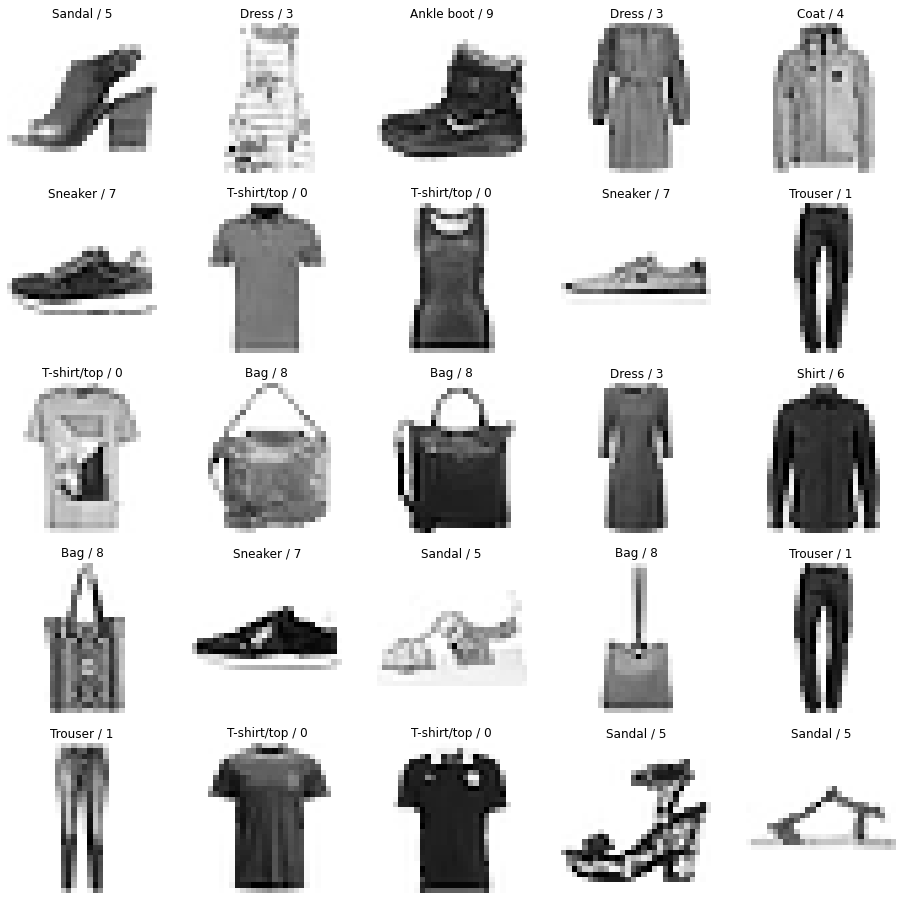

In [ ]:
plt.figure(figsize=(16,16))
j = 1
for i in np.random.randint(0, 1000, 25):
    plt.subplot(5, 5, j); j += 1
    plt.imshow(X_train[i], cmap='Greys')
    plt.axis('off')
    plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

In [ ]:
X_train.ndim

3

In [ ]:
X_train = np.expand_dims(X_train, -1)

In [ ]:
X_train.ndim

4

In [ ]:
X_test = np.expand_dims(X_test, -1)

In [ ]:
# Feature Scaling

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
# Split dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=2020)

In [ ]:
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

## Step 3) Building the CNN model

In [ ]:
model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/10
94/94 [==============================] - 21s 212ms/step - loss: 0.6299 - accuracy: 0.7838 - val_loss: 0.4163 - val_accuracy: 0.8579
Epoch 2/10
94/94 [==============================] - 20s 214ms/step - loss: 0.3831 - accuracy: 0.8666 - val_loss: 0.3670 - val_accuracy: 0.8718
Epoch 3/10
94/94 [==============================] - 20s 214ms/step - loss: 0.3349 - accuracy: 0.8833 - val_loss: 0.3450 - val_accuracy: 0.8780
Epoch 4/10
94/94 [==============================] - 20s 216ms/step - loss: 0.3029 - accuracy: 0.8946 - val_loss: 0.3102 - val_accuracy: 0.8910
Epoch 5/10
94/94 [==============================] - 20s 214ms/step - loss: 0.2805 - accuracy: 0.9019 - val_loss: 0.3068 - val_accuracy: 0.8927
Epoch 6/10
94/94 [==============================] - 20s 215ms/step - loss: 0.2689 - accuracy: 0.9050 - val_loss: 0.2928 - val_accuracy: 0.8950
Epoch 7/10
94/94 [==============================] - 20s 213ms/step - loss: 0.2486 - accuracy: 0.9125 - val_loss: 0.2854 - val_accuracy: 0.8997

## Step 4) Testing and evaluation

In [ ]:
y_pred = model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.98, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.03, 0.01, 0.  ]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2771 - accuracy: 0.9019


[0.277070015668869, 0.9018999934196472]

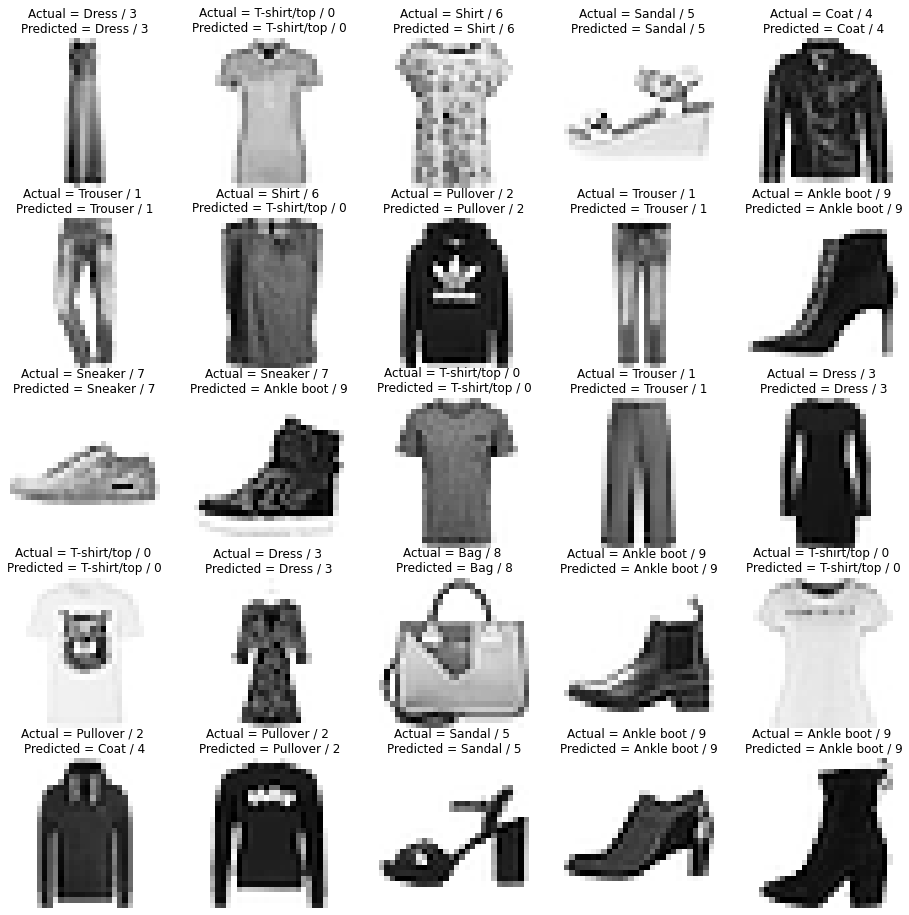

In [ ]:
plt.figure(figsize=(16,16))
j = 1
for i in np.random.randint(0, 1000, 25):
    plt.subplot(5, 5, j); j += 1
    plt.imshow(X_test[i].reshape(28,28), cmap='Greys')
    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
    plt.axis('off')

In [ ]:
""" ## Confusion Matrix """

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.88      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.85      0.84      0.85      1000
       Dress       0.93      0.88      0.90      1000
        Coat       0.81      0.90      0.85      1000
      Sandal       0.96      0.99      0.97      1000
       Shirt       0.77      0.67      0.72      1000
     Sneaker       0.96      0.94      0.95      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



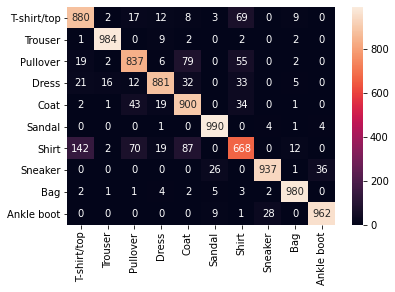

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [ ]:
"""# Save Model"""

In [ ]:
model.save('fashion_mnist_cnn_model.h5')

## Build 2nd complex CNN

In [ ]:
# Building CNN model
cnn_model2 = keras.models.Sequential([
                                      keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
                                      keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                                      keras.layers.Flatten(),
                                      keras.layers.Dense(units=128, activation='relu'),
                                      keras.layers.Dropout(0.25),
                                      keras.layers.Dense(units=256, activation='relu'),
                                      keras.layers.Dropout(0.25),
                                      keras.layers.Dense(units=128, activation='relu'),
                                      keras.layers.Dense(units=10, activation='softmax')
])

# Compile the model
cnn_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

cnn_model2.save('fashion_mnist_cnn_model2.h5')

Epoch 1/20
94/94 [==============================] - 26s 276ms/step - loss: 0.8589 - accuracy: 0.6743 - val_loss: 0.4687 - val_accuracy: 0.8295
Epoch 2/20
94/94 [==============================] - 26s 278ms/step - loss: 0.4492 - accuracy: 0.8371 - val_loss: 0.3605 - val_accuracy: 0.8690
Epoch 3/20
94/94 [==============================] - 26s 278ms/step - loss: 0.3662 - accuracy: 0.8673 - val_loss: 0.3192 - val_accuracy: 0.8827
Epoch 4/20
94/94 [==============================] - 26s 278ms/step - loss: 0.3238 - accuracy: 0.8838 - val_loss: 0.2948 - val_accuracy: 0.8916
Epoch 5/20
94/94 [==============================] - 27s 285ms/step - loss: 0.3013 - accuracy: 0.8892 - val_loss: 0.2854 - val_accuracy: 0.8964
Epoch 6/20
94/94 [==============================] - 27s 285ms/step - loss: 0.2764 - accuracy: 0.8983 - val_loss: 0.2709 - val_accuracy: 0.9008
Epoch 7/20
94/94 [==============================] - 26s 281ms/step - loss: 0.2594 - accuracy: 0.9039 - val_loss: 0.2594 - val_accuracy: 0.9047

## Testing and evaluation

In [ ]:
y_pred = cnn_model2.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.04, 0.  , 0.  ]], dtype=float32)

In [ ]:
cnn_model2.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.2610 - accuracy: 0.9155


[0.2609618604183197, 0.9154999852180481]

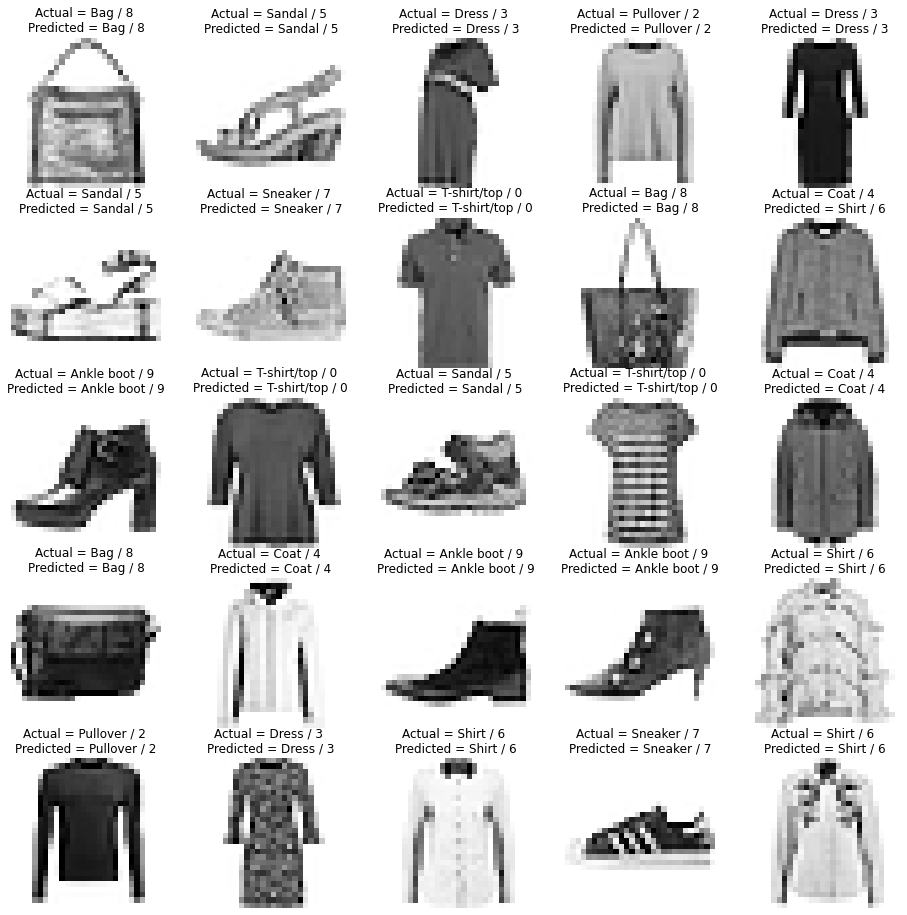

In [ ]:
plt.figure(figsize=(16,16))
j = 1
for i in np.random.randint(0, 1000, 25):
    plt.subplot(5, 5, j); j += 1
    plt.imshow(X_test[i].reshape(28,28), cmap='Greys')
    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
    plt.axis('off')

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.87      0.86      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.84      0.90      0.87      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.86      0.86      0.86      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.80      0.70      0.74      1000
     Sneaker       0.95      0.98      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.91      0.92      0.91     10000
weighted avg       0.91      0.92      0.91     10000



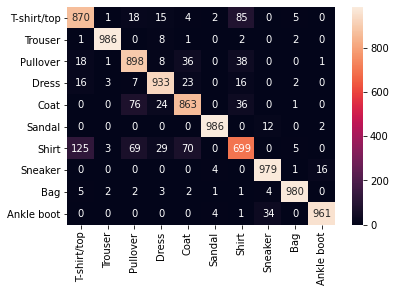

In [ ]:
# Confusion matrix
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
cr = classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

## Build 3rd complex CNN

In [ ]:
# Building CNN model
cnn_model3 = keras.models.Sequential([
                                      keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
                                      keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                                      keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                                      keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      keras.layers.Flatten(),
                                      keras.layers.Dense(units=128, activation='relu'),
                                      keras.layers.Dropout(0.25),
                                      keras.layers.Dense(units=256, activation='relu'),
                                      keras.layers.Dropout(0.5),
                                      keras.layers.Dense(units=256, activation='relu'),
                                      keras.layers.Dropout(0.25),
                                      keras.layers.Dense(units=128, activation='relu'),
                                      keras.layers.Dropout(0.10),
                                      keras.layers.Dense(units=10, activation='softmax')
])

# Compile the model
cnn_model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

cnn_model3.save('fashion_mnist_cnn_model3.h5')

Epoch 1/50
94/94 [==============================] - 54s 569ms/step - loss: 1.1972 - accuracy: 0.5299 - val_loss: 0.6391 - val_accuracy: 0.7553
Epoch 2/50
94/94 [==============================] - 53s 568ms/step - loss: 0.6038 - accuracy: 0.7681 - val_loss: 0.4903 - val_accuracy: 0.8121
Epoch 3/50
94/94 [==============================] - 53s 565ms/step - loss: 0.4880 - accuracy: 0.8220 - val_loss: 0.4203 - val_accuracy: 0.8477
Epoch 4/50
94/94 [==============================] - 53s 565ms/step - loss: 0.4176 - accuracy: 0.8511 - val_loss: 0.3923 - val_accuracy: 0.8598
Epoch 5/50
94/94 [==============================] - 53s 565ms/step - loss: 0.3697 - accuracy: 0.8689 - val_loss: 0.3359 - val_accuracy: 0.8808
Epoch 6/50
94/94 [==============================] - 53s 569ms/step - loss: 0.3421 - accuracy: 0.8787 - val_loss: 0.3554 - val_accuracy: 0.8740
Epoch 7/50
94/94 [==============================] - 54s 572ms/step - loss: 0.3141 - accuracy: 0.8886 - val_loss: 0.3225 - val_accuracy: 0.8857

## Testing and evaluation

In [47]:
y_pred = cnn_model3.predict(X_test)
y_pred.round(2)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [48]:
cnn_model3.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.4522 - accuracy: 0.9065


[0.45215561985969543, 0.906499981880188]

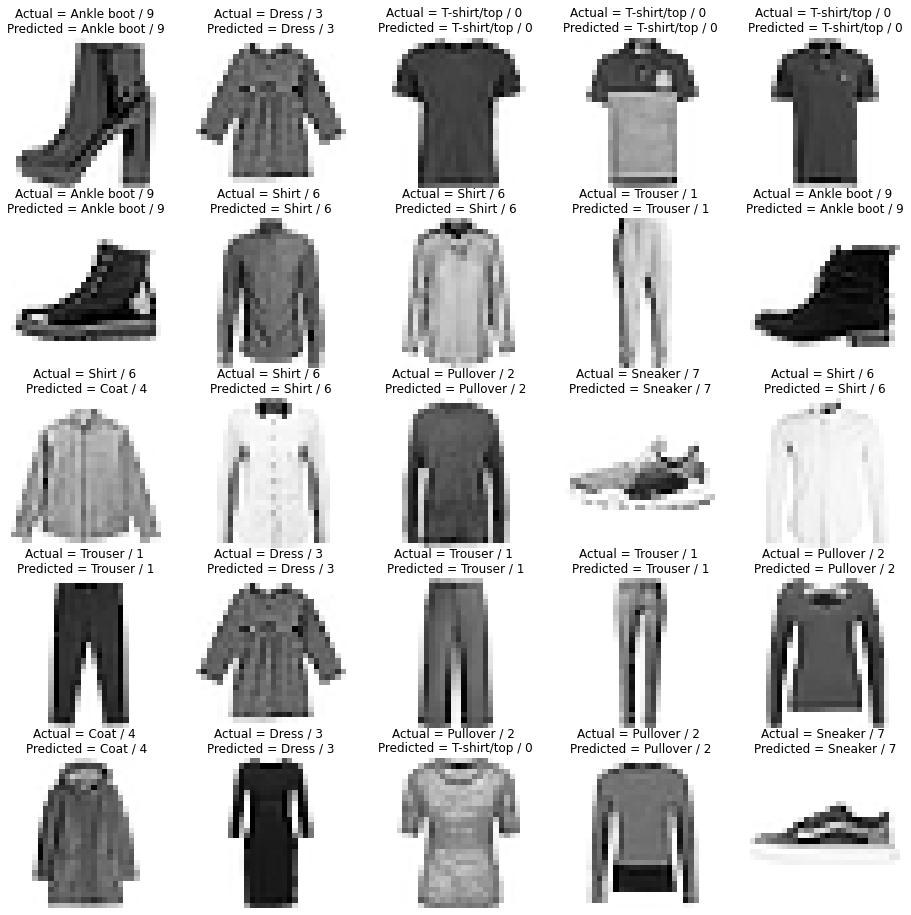

In [49]:
plt.figure(figsize=(16,16))
j = 1
for i in np.random.randint(0, 1000, 25):
    plt.subplot(5, 5, j); j += 1
    plt.imshow(X_test[i].reshape(28,28), cmap='Greys')
    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
    plt.axis('off')

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.87      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.87      0.85      0.86      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.82      0.90      0.85      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.76      0.68      0.72      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



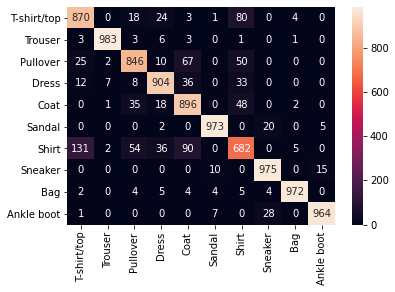

In [50]:
# Confusion matrix
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
cr = classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)